# Example Prediction Temperature Working on 8th Month To Predict The temperature of Weekly Nasa Dataset

In [1]:
import pandas as pd
data = pd.read_csv('Month8.csv')
data.columns

Index(['ALLSKY_KT', 'WS2M', 'T2M', 'PS', 'WS10M', 'QV2M', 'RH2M'], dtype='object')

In [2]:
data.shape

(1209, 7)

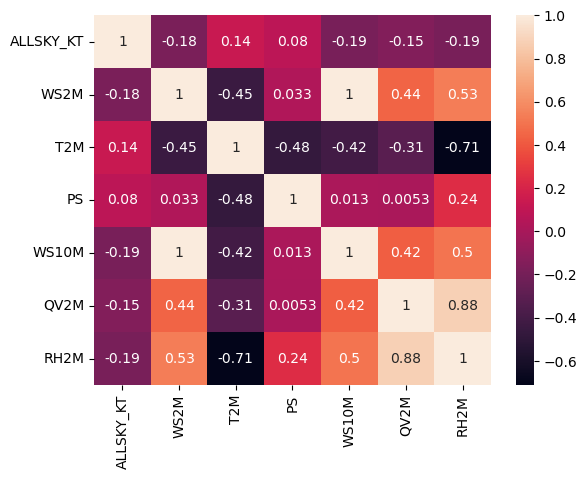

In [3]:
import seaborn as sns 
import matplotlib.pyplot as plt
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [4]:
data.head(5)

,ALLSKY_KT,WS2M,T2M,PS,WS10M,QV2M,RH2M
0,0.029323,0.116889,-6.078319,-0.331191,0.273828,-3.657159,-1.486381
1,0.039323,0.006888,-5.988319,-0.271191,0.193828,-3.717159,-1.546381
2,-0.060677,0.946889,-7.378319,-0.081191,1.313828,-2.987159,5.513619
3,-0.110677,0.366889,-7.838319,0.118809,0.603828,-3.227159,6.323619
4,-0.010677,0.226888,-7.318319,0.078809,0.513828,-4.697159,-1.736381


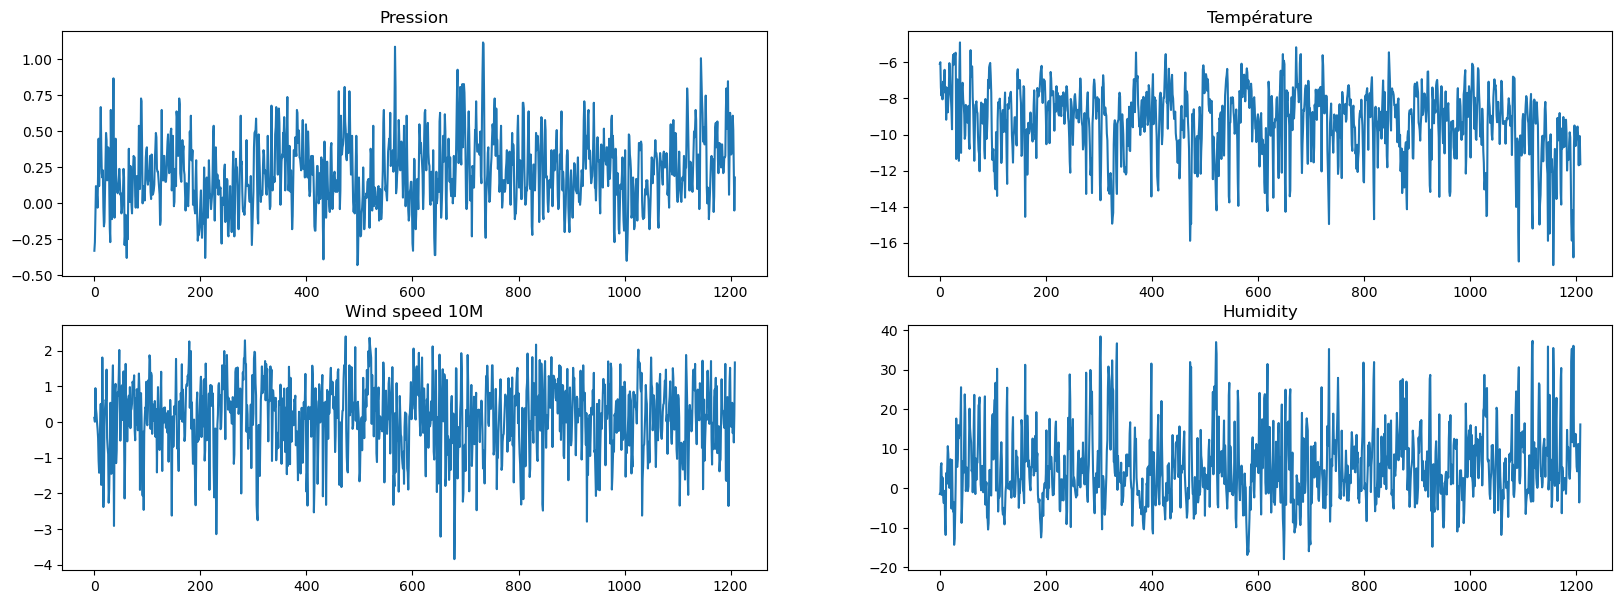

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,7))
# Évolution de la pression
ax1 = fig.add_subplot(221)
plt.plot(data['PS'])
ax1.title.set_text('Pression')
# Évolution de la température
ax2 = fig.add_subplot(222)
plt.plot(data['T2M'])
ax2.title.set_text('Température')
# Évolution de la vont
ax3 = fig.add_subplot(223)
plt.plot(data['WS2M'])
ax3.title.set_text('Wind speed 10M')
# Évolution du déficit de himidité de vapeur
ax4 = fig.add_subplot(224)
plt.plot(data['RH2M'])
ax4.title.set_text('Humidity')
# Evolution de radation
#ax5 = fig.add_subplot(225)
#plt.plot(data['Radiation'])
#ax5.title.set_text('Radation')

plt.show()

In [6]:
split_fraction = 0.80
split_idx = int(split_fraction * len(data))
# Train: on conserve les 80% premières lignes
train_data = data.loc[0:split_idx-1].values
# Test: on conserve les 20% dernières lignes
val_data = data.loc[split_idx:].values
print(f"Jeu d'apprentissage : {train_data.shape}, jeu d'évaluation : {val_data.shape}")

Jeu d'apprentissage : (967, 7), jeu d'évaluation : (242, 7)


### Train The NN and obtimise with descente de gradient

In [7]:
# Importation 
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib as plt

In [8]:
# Création du jeu d'entraînement
sampling_rate = 1 # Fréquence d'échantillonnage
sequence_length = 120  # Longueur de la séquence
batch_size = 256 # Taille de batch

# Création du jeu d'entraînement: contient Temperature, Pressure, Humidity, WindSpeed, day length
X_train = tf.keras.utils.timeseries_dataset_from_array(
    data=train_data[:, (0,1,3,4,5,6)],
    targets=None,
    sequence_length=sequence_length,
    sampling_rate=sampling_rate,
    batch_size=batch_size,
)

y_train = tf.keras.utils.timeseries_dataset_from_array(
    data=train_data[:, 2],
    targets=None,
    sequence_length=sequence_length,
    sampling_rate=sampling_rate,
    batch_size=batch_size,
)

dataset_train = tf.data.Dataset.zip((X_train, y_train))
# Création du jeu d'évaluation

X_val = tf.keras.utils.timeseries_dataset_from_array(
    data=val_data[:, (0,1,3,4,5,6)],
    targets=None,
    sequence_length=sequence_length,
    sampling_rate=sampling_rate,
    batch_size=batch_size,
)

y_val = tf.keras.utils.timeseries_dataset_from_array(
    data=val_data[:, 2],
    targets=None,
    sequence_length=sequence_length,
    sampling_rate=sampling_rate,
    batch_size=batch_size,
)

dataset_val = tf.data.Dataset.zip((X_val, y_val))

# Training The RNN To Predict Third Month

In [9]:
# from tensorflow import keras

dimension = train_data.shape[1]-1
inputs = keras.layers.Input(shape=(sequence_length, dimension))
gru_out = keras.layers.GRU(dimension, return_sequences=True)(inputs)
dense_out = keras.layers.Dense(dimension, activation='relu')(gru_out)
outputs = keras.layers.Dense(1)(dense_out)

model = keras.Model(inputs=inputs, outputs=outputs)

In [10]:
learning_rate = 0.001
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 120, 6)]          0         
                                                                 
 gru (GRU)                   (None, 120, 6)            252       
                                                                 
 dense (Dense)               (None, 120, 6)            42        
                                                                 
 dense_1 (Dense)             (None, 120, 1)            7         
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [11]:
epochs = 100
model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
)

Epoch 1/100
4/4 [==============================] - 4s 313ms/step - loss: 98.0223 - val_loss: 112.9806
Epoch 2/100
4/4 [==============================] - 0s 100ms/step - loss: 96.7349 - val_loss: 111.6052
Epoch 3/100
4/4 [==============================] - 0s 93ms/step - loss: 95.4414 - val_loss: 110.2153
Epoch 4/100
4/4 [==============================] - 0s 99ms/step - loss: 94.1382 - val_loss: 108.8111
Epoch 5/100
4/4 [==============================] - 0s 100ms/step - loss: 92.8205 - val_loss: 107.3923
Epoch 6/100
4/4 [==============================] - 0s 113ms/step - loss: 91.4915 - val_loss: 105.9544
Epoch 7/100
4/4 [==============================] - 0s 113ms/step - loss: 90.1424 - val_loss: 104.4878
Epoch 8/100
4/4 [==============================] - 0s 110ms/step - loss: 88.7702 - val_loss: 102.9911
Epoch 9/100
4/4 [==============================] - 0s 106ms/step - loss: 87.3727 - val_loss: 101.4548
Epoch 10/100
4/4 [==============================] - 0s 102ms/step - loss: 85.9469 - 

4/4 [==============================] - 0s 100ms/step - loss: 13.9018 - val_loss: 20.3129
Epoch 82/100
4/4 [==============================] - 0s 100ms/step - loss: 13.3485 - val_loss: 19.6418
Epoch 83/100
4/4 [==============================] - 0s 100ms/step - loss: 12.8152 - val_loss: 18.9918
Epoch 84/100
4/4 [==============================] - 0s 95ms/step - loss: 12.3019 - val_loss: 18.3629
Epoch 85/100
4/4 [==============================] - 0s 100ms/step - loss: 11.8083 - val_loss: 17.7550
Epoch 86/100
4/4 [==============================] - 0s 105ms/step - loss: 11.3343 - val_loss: 17.1680
Epoch 87/100
4/4 [==============================] - 0s 100ms/step - loss: 10.8797 - val_loss: 16.6016
Epoch 88/100
4/4 [==============================] - 0s 97ms/step - loss: 10.4441 - val_loss: 16.0558
Epoch 89/100
4/4 [==============================] - 0s 98ms/step - loss: 10.0273 - val_loss: 15.5302
Epoch 90/100
4/4 [==============================] - 0s 102ms/step - loss: 9.6289 - val_loss: 15.02

In [12]:
import matplotlib.pyplot as plt 
from matplotlib.pyplot import scatter
def show_plot(predicted_data, true_data):
    plt.title('Prédiction synchrone')
    plt.plot(predicted_data, "rx", label="Temperature prédite")
    plt.plot(true_data, ".-", label="Vraie Temperature")
    plt.legend()
    plt.xlabel("Pas de temps")
    plt.show()
    return

4/4 [==============================] - 1s 13ms/step


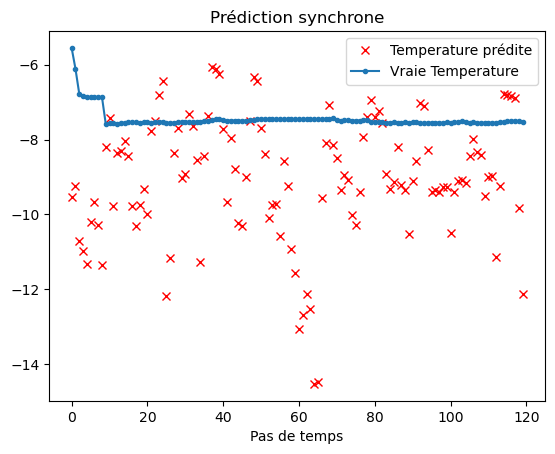

In [13]:
for x, y in dataset_val.take(3):
     show_plot(y[0].numpy(), model.predict(x)[0])

In [14]:
mean_absolute_error = tf.keras.losses.MeanAbsoluteError()
error = 0

for x, y in dataset_val:
    y_pred = model(x)
    error += mean_absolute_error(y, y_pred).numpy()

print(f"Erreur absolue moyenne : {error/len(dataset_val):.5f}")


Erreur absolue moyenne : 2.60740


## Prédiction de la température future

In [15]:
past_length = 120
future_step = 1

label_start = past_length + future_step  # Début de la séquence des labels
label_end = label_start + split_idx  # Fin de la séquence des labels

x_train = train_data
y_train = data[label_start:label_end][['T2M']]

x_end = len(val_data) - past_length - future_step # Fin de la séquence des données d'entrées en validation

label_start = split_idx + past_length + future_step # Début de la séquence des labels en validation
x_val = val_data[:x_end]
y_val = data[label_start:][['T2M']]

In [16]:
batch_size = 256
step_size = 1 # Facteur d'échantillonnage
sequence_length = int(past_length / step_size)

dataset_train = tf.keras.utils.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step_size,
    batch_size=batch_size,
)

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step_size,
    batch_size=batch_size,
)

In [17]:
learning_rate = 0.001

input_dim = train_data.shape[1]
hidden_dim = 32
inputs = keras.layers.Input(shape=(sequence_length, input_dim))
gru_out = keras.layers.GRU(hidden_dim)(inputs)
dense_out = keras.layers.Dense(hidden_dim, activation='relu')(gru_out)
outputs = keras.layers.Dense(1)(dense_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 120, 7)]          0         
                                                                 
 gru_1 (GRU)                 (None, 32)                3936      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,025
Trainable params: 5,025
Non-trainable params: 0
_________________________________________________________________


In [18]:
epochs = 50

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
)

Epoch 1/50
4/4 [==============================] - 3s 279ms/step - loss: 55.4391 - val_loss: 64.0120
Epoch 2/50
4/4 [==============================] - 1s 128ms/step - loss: 45.0343 - val_loss: 52.6016
Epoch 3/50
4/4 [==============================] - 1s 130ms/step - loss: 36.1881 - val_loss: 42.5194
Epoch 4/50
4/4 [==============================] - 1s 129ms/step - loss: 28.5762 - val_loss: 33.6601
Epoch 5/50
4/4 [==============================] - 1s 129ms/step - loss: 22.0937 - val_loss: 26.3340
Epoch 6/50
4/4 [==============================] - 1s 130ms/step - loss: 16.7344 - val_loss: 20.0447
Epoch 7/50
4/4 [==============================] - 1s 143ms/step - loss: 12.4565 - val_loss: 14.8912
Epoch 8/50
4/4 [==============================] - 1s 169ms/step - loss: 9.1530 - val_loss: 10.7527
Epoch 9/50
4/4 [==============================] - 1s 149ms/step - loss: 6.7121 - val_loss: 7.5550
Epoch 10/50
4/4 [==============================] - 1s 146ms/step - loss: 5.0354 - val_loss: 5.2057
Epoc

In [19]:
def show_plot(sequence, prediction, ground_truth, delta=future_step/step_size, title=None):
    plt.title(title)
    plt.plot(sequence.flatten(), ".-", label="Temperature")
    plt.plot(len(sequence) + delta, prediction, "go", label="Prédiction")
    plt.plot(len(sequence) + delta, ground_truth, "rx", label="Vraie Temperature")
    plt.legend()
    plt.xlim(-1, len(sequence) + delta + 3)
    plt.xlabel("Pas de temps")
    plt.show()

1/1 [==============================] - 1s 621ms/step


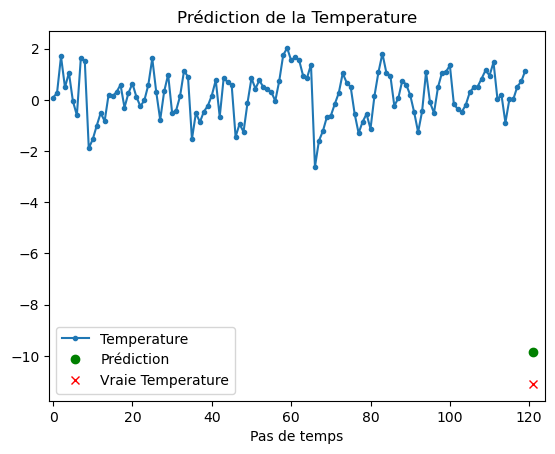

In [20]:
for x, y in dataset_val.take(5):
    show_plot(x[0][:, 1].numpy(), model.predict(x)[0], y[0].numpy(), title="Prédiction de la Temperature")

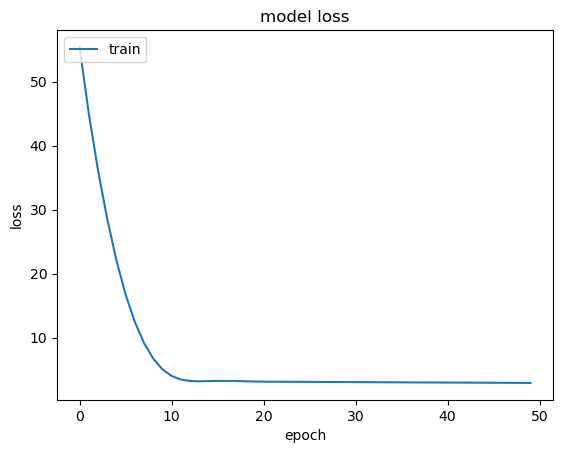

In [21]:

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()